# Customer Churn Prediction

Sutirtha Mukherjee \
16/11/2023

## Contents
- [Project Overview](#project-overview)
- [Importing Libraries](#importing-libraries)
- [Load Data](#load-data)
- [Data Cleaning](#data-cleaning)
- [Data Partitioning](#data-partitioning)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Data Preprocessing for Modelling](#data-preprocessing-for-modelling)
- [Machine Learning Models](#machine-learning-models)
- [Conclusions](#conclusions)

## Project overview <a id="project-overview"></a>


In this machine learning (ML) project, our primary objective is to develop robust ML models for predicting customer churn in the context of commercial banks. We will use historical customer data, including features like usage behavior, customer demographics, and other relevant attributes. Our approach involves applying a variety of ML algorithms, such as Logistic Regression, Random Forests, and Gradient Boosting, to determine whether a customer is likely to churn or not.


### About the Dataset
We have access to a dataset containing various bank-details of 10,000 customers. The dataset contains information such as CustomerID, Name, Credit score, Balance and many more. The dataset was sourced from the following Kaggle link: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction.

## Importing Libraries <a id="importing-libraries"></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate,StratifiedKFold
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.dummy import DummyClassifier

from xgboost import XGBClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score,roc_curve,make_scorer

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

## Load data <a id="load-data"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CodSoftInternship/ChurnPrediction/Churn_Modelling.csv")

In [ ]:
pd.options.display.max_columns=50
pd.options.display.max_rows=100

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Cleaning <a id="data-cleaning"></a>

In [ ]:
#The 'Rownumber' and 'CustomerID' columns are sequential and may not provide useful information for classification.
#Surname is also not useful.
data.drop(columns=['RowNumber',"CustomerId",'Surname'],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


- Checking missing values :

In [ ]:
data.isnull().sum().sum()

0

There is no missing value in the dataset.

- Checking duplicated rows :

In [ ]:
data.duplicated().sum()

0

There are no duplicated rows.

## Data Partitioning <a id="data-partitioning"></a>

- Separating input features and target labels :

In [ ]:
X = data.drop(columns='Exited')
y = data["Exited"]

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

- Train-Test Split :

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [ ]:
y_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [ ]:
train_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test],axis=1)

## Exploratory data analysis <a id="exploratory-data-analysis"></a>

### Summary Statistics

In [ ]:
num_columns = train_data.select_dtypes(include=np.number).columns
num_columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
train_data[num_columns].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000
mean,650.752500,38.946625,5.016625,76381.207499,1.529500,0.708750,0.514875,99730.811581,0.20375
std,96.596432,10.526876,2.896791,62302.053597,0.581741,0.454367,0.499810,57335.116540,0.40281
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.00000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50691.817500,0.00000
50%,652.000000,37.000000,5.000000,97055.145000,1.000000,1.000000,1.000000,99446.940000,0.00000
75%,717.000000,44.000000,8.000000,127633.195000,2.000000,1.000000,1.000000,148527.730000,0.00000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.00000


In [ ]:
cat_columns = train_data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
train_data[cat_columns].describe()

,Geography,Gender
count,8000,8000
unique,3,2
top,France,Male
freq,3993,4387


### Visualization

#### The Target Imbalance

Churn cases are denoted by 1.

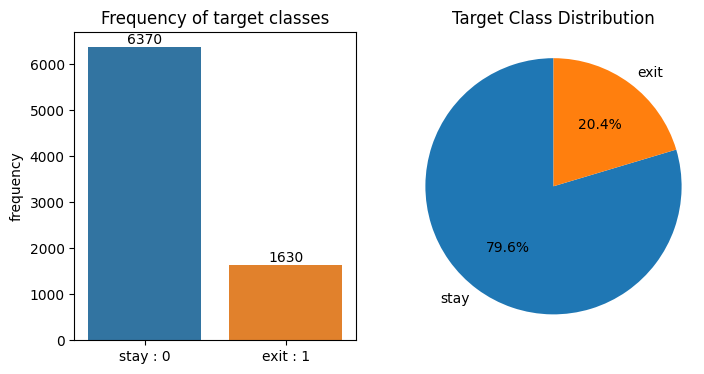

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.barplot(x=['stay : 0','exit : 1'],y=train_data["Exited"].value_counts())

for i, count in enumerate(train_data["Exited"].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title("Frequency of target classes")
plt.ylabel("frequency")

plt.subplot(1,2,2)
plt.pie(train_data["Exited"].value_counts(), labels=['stay','exit'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Target Class Distribution')
plt.show()

The dataset exhibits class imbalance, with the minority target class having only 20% of the data.

#### Data distribution of numercal features

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2151 to 6206
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8000 non-null   int64  
 1   Geography        8000 non-null   object 
 2   Gender           8000 non-null   object 
 3   Age              8000 non-null   int64  
 4   Tenure           8000 non-null   int64  
 5   Balance          8000 non-null   float64
 6   NumOfProducts    8000 non-null   int64  
 7   HasCrCard        8000 non-null   int64  
 8   IsActiveMember   8000 non-null   int64  
 9   EstimatedSalary  8000 non-null   float64
 10  Exited           8000 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 750.0+ KB


In [ ]:
# graph = sns.PairGrid(data[['CreditScore','Age',"Tenure","Balance","EstimatedSalary",'Exited']],
#                      hue='Exited', diag_sharey=False)
# graph.map_upper(sns.scatterplot)
# graph.map_diag(sns.kdeplot)
# graph.map_lower(sns.kdeplot)
# sns.pairplot(data[['CreditScore','Age',"Tenure","Balance","EstimatedSalary",'Exited']],hue='Exited')

# plt.show()

- "CreditScore" feature:

In [ ]:
train_data[train_data.Exited==0]["CreditScore"].describe()

count    6370.000000
mean      652.413658
std        95.514729
min       405.000000
25%       586.000000
50%       654.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64

In [ ]:
train_data[train_data.Exited==1]["CreditScore"].describe()

count    1630.000000
mean      644.260736
std       100.479428
min       350.000000
25%       576.000000
50%       645.000000
75%       715.750000
max       850.000000
Name: CreditScore, dtype: float64

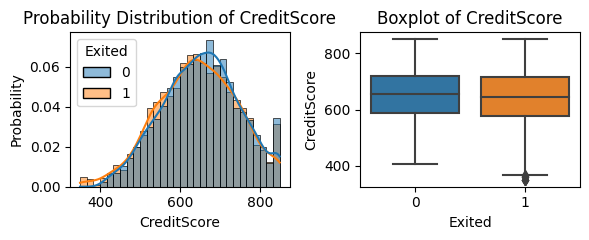

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6, 2.5))

sns.histplot(data=train_data, x='CreditScore', bins=30,stat='probability',
             hue='Exited',kde=True, ax=axes[0],common_norm=False)
axes[0].set_title("Probability Distribution of CreditScore")

sns.boxplot(train_data,y='CreditScore',x='Exited',ax=axes[1])
axes[1].set_title("Boxplot of CreditScore")
plt.tight_layout()

plt.show()


The distribution and median of the 'CreditScore' feature for different target classes are not very different. This suggests that this feature may not be particularly useful in distinguishing between the two classes.

- "Age" feature :

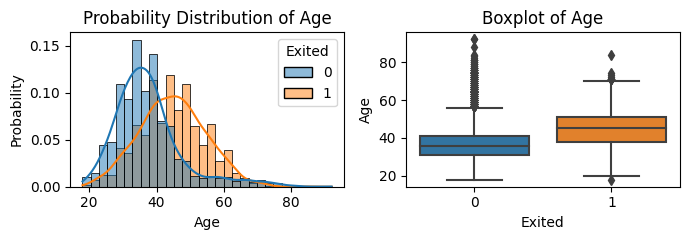

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(7, 2.5))

sns.histplot(data=train_data, x='Age', bins=30,stat='probability',
             hue='Exited',kde=True, ax=axes[0],common_norm=False)
axes[0].set_title("Probability Distribution of Age")

sns.boxplot(train_data,y='Age',x='Exited',ax=axes[1])
axes[1].set_title("Boxplot of Age")

plt.tight_layout()

plt.show()


A significant difference in the distribution of the 'Age' feature for two different target classes strongly suggests that this feature can play an important role in churn classification.

Interestingly, the plots indicate that the older customers have a higher tendency to churn.

- "Tenure" feature :

In [ ]:
#percentage of customer churn per category
def churn_rate_by_category(feature):
    customers_per_category = train_data[feature].value_counts()
    churns_per_category = train_data[train_data.Exited==1][feature].value_counts()
    churn_percentage = churns_per_category/customers_per_category*100

    fig, axes = plt.subplots(1, 2, figsize=(7, 2.5))

    sns.countplot(data=train_data, x=feature,hue='Exited',ax=axes[0])
    axes[0].set_title(f"Countplot of "+feature)

    sns.barplot(x=churn_percentage.keys(),y=churn_percentage,ax=axes[1])
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel("churn rate (%)")
    axes[1].set_title(f"Customer Churn rate by "+feature)

#        # Add text labels
#     for i, count in enumerate(churn_percentage):
#         axes[1].text(i, count, f"{count:.0f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

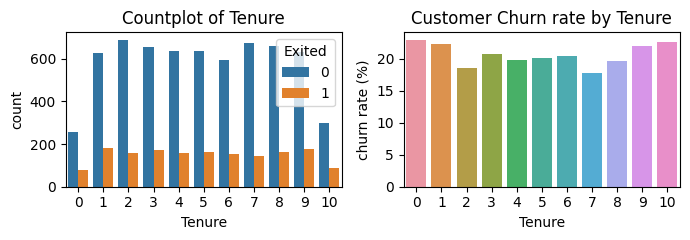

In [ ]:
churn_rate_by_category("Tenure")

- "Balance" feature :

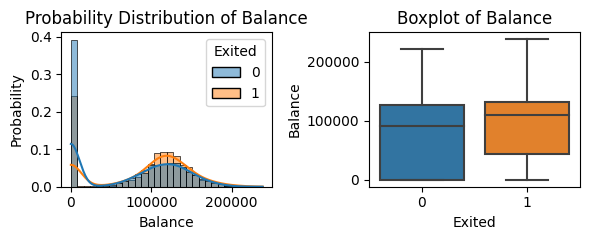

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6, 2.5))

sns.histplot(data=train_data, x='Balance', bins=30,stat='probability',
             hue='Exited',kde=True, ax=axes[0],common_norm=False)
axes[0].set_title("Probability Distribution of Balance")

sns.boxplot(train_data,y='Balance',x='Exited',ax=axes[1])
axes[1].set_title("Boxplot of Balance")

plt.tight_layout()

plt.show()

The sharp peak at 0 simply describes that a large number of customers have zero-balance account.

The difference in median values between the two different classes suggests that this feature may possess some discriminative power. However, the significant overlap in the distributions of this feature across different target classes raises uncertainty about the feature's utility for classification.

- "NumOfProducts" feature:

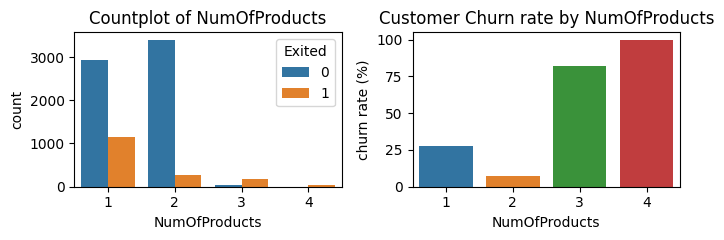

In [ ]:
churn_rate_by_category('NumOfProducts')

The different values of churn rate across different categories of NumProducts feature suggest that this feature could be important for churn classfication. Interestingly, customers with more products have higher churn rate.


- HasCrCard	feature:

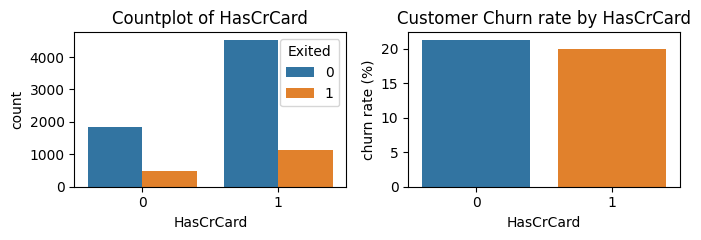

In [ ]:
churn_rate_by_category("HasCrCard")

It is not very clear from this analysis whether credit card plays any role in determing the exit of a customer.

- IsActiveMember feature:

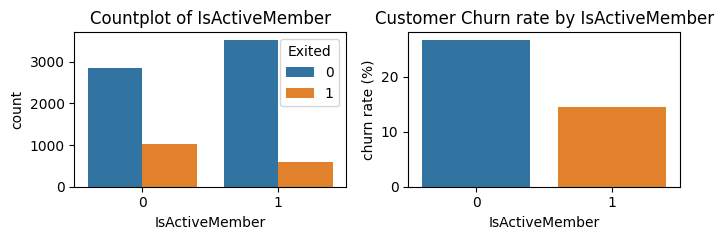

In [ ]:
churn_rate_by_category("IsActiveMember")

Intutitvely, the inactive memebers are more likely to churn, and this is precisely what the plots reveal.

- "EstimatedSalary" feature :

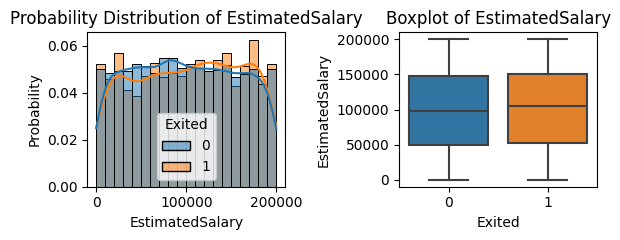

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6, 2.5))

sns.histplot(data=train_data, x='EstimatedSalary', bins=20,stat='probability',
             hue='Exited',kde=True, ax=axes[0],common_norm=False)
axes[0].set_title("Probability Distribution of EstimatedSalary")

sns.boxplot(train_data,y='EstimatedSalary',x='Exited',ax=axes[1])
axes[1].set_title("Boxplot of EstimatedSalary")

plt.tight_layout()

plt.show()


The EstimatedSalary feature does not appear to play a crucial role in churn classification.

#### Visualizing categorical features

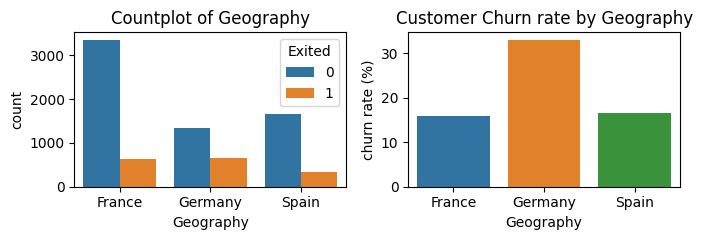

In [ ]:
churn_rate_by_category('Geography')

The plots reveal that customers from Germany exhibit a significantly higher churn rate compared to those from France and Spain, highlighting the importance of the Geography feature.

- 'Gender' feature :

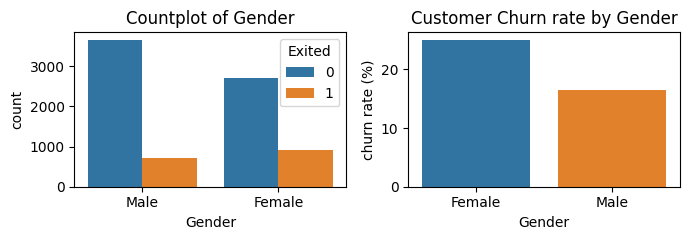

In [ ]:
churn_rate_by_category('Gender')

The Gender feature could be a potential factor in discriminating between churn classes. Notably, female customers have a higher churn rate.

### Feature engineering

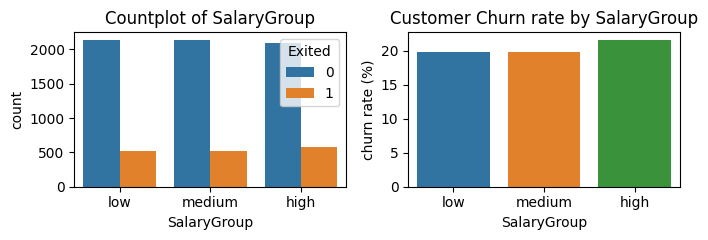

In [ ]:
labels = ["low","medium","high"]
train_data['SalaryGroup'] = pd.qcut(train_data.EstimatedSalary,q=3,labels=labels)
churn_rate_by_category('SalaryGroup')

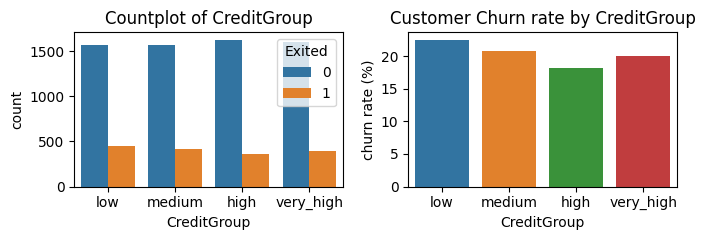

In [ ]:
labels = ["low","medium","high","very_high"]
train_data['CreditGroup'] = pd.qcut(train_data.CreditScore,q=4,labels=labels,duplicates='drop')
churn_rate_by_category('CreditGroup')

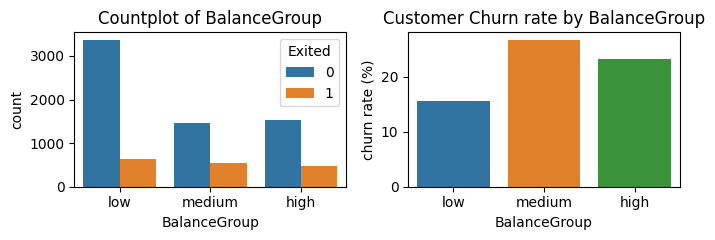

In [ ]:
labels = ["low","medium","high"]
train_data['BalanceGroup'] = pd.qcut(train_data.Balance,q=4,duplicates='drop',labels=labels)
churn_rate_by_category('BalanceGroup')


I have created three new categorical features, namely 'BalanceGroup,' 'SalaryGroup,' and 'CreditGroup,' from their corresponding numerical features. I will compare  the importance of these categorical features with their numerical counterparts in our machine learning model. We can then keep the most informative features for our final model.

### Correlation between features

In [ ]:
train_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'SalaryGroup', 'CreditGroup', 'BalanceGroup'],
      dtype='object')

In [ ]:
data_dummy = train_data[['Exited','CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
data_dummy = pd.get_dummies(data_dummy)

correlations = data_dummy.corr()

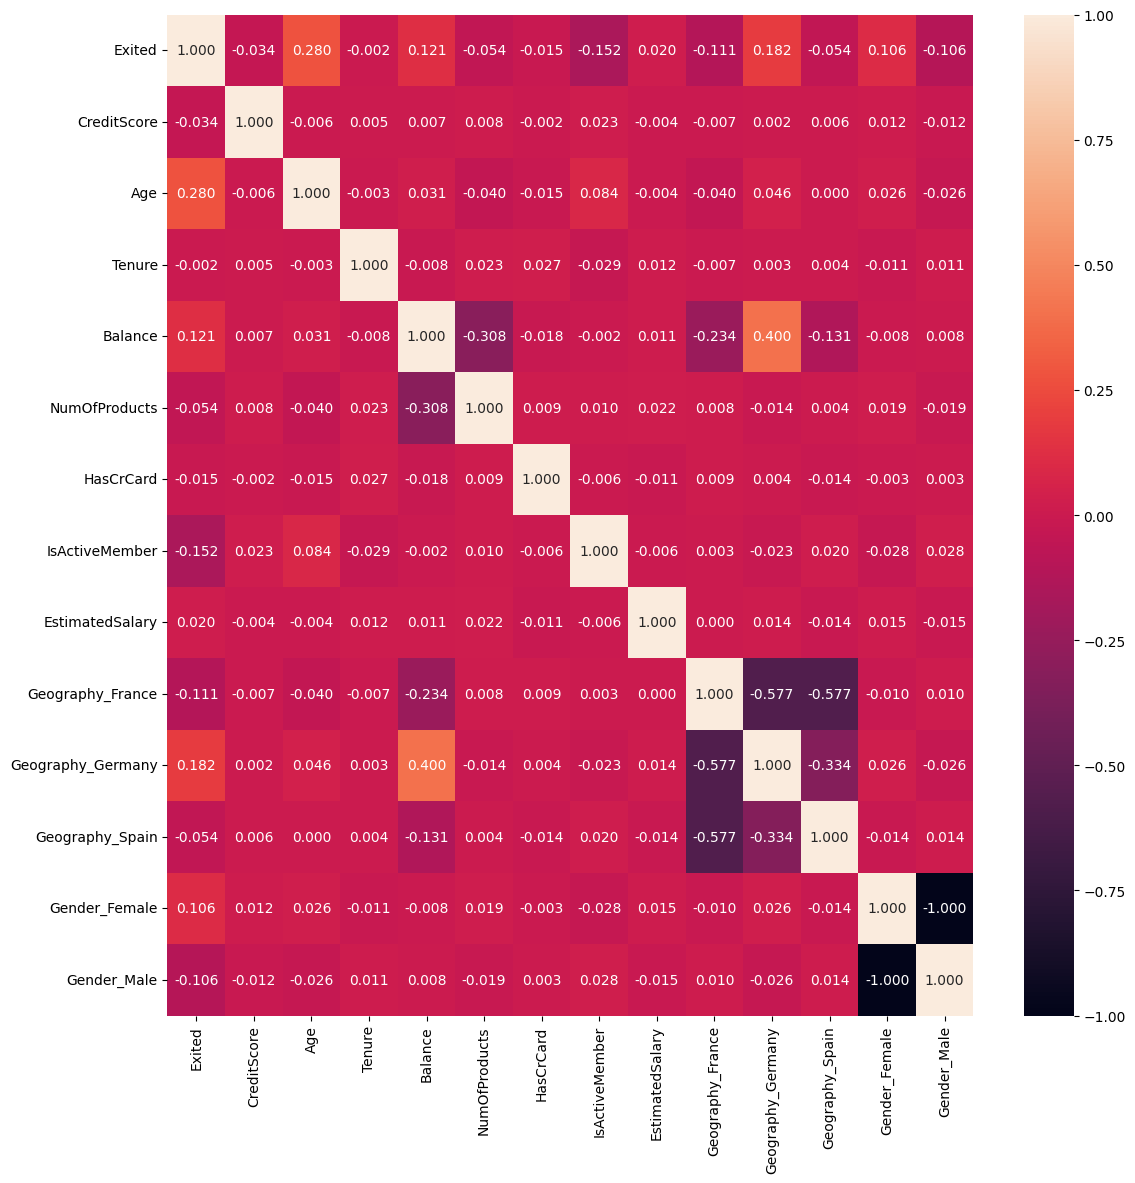

In [ ]:
plt.figure(figsize=(13, 13))
annot_kws = {"size": 10}
sns.heatmap(correlations, annot=True, annot_kws=annot_kws, fmt=".3f")
plt.show()

The correlation analysis is consistent with our EDA using plots. Both approaches suggest that certain features, including Age, Balance, IsActiveMember, Geography, and Gender, may play a crucial role in churn classification.   

## Data Preprocessing for Modelling <a id="data-preprocessing-for-modelling"></a>

In [ ]:
num_columns = train_data.select_dtypes(include=np.number).columns
num_columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
cat_columns = train_data.select_dtypes(include=[object,"category"]).columns
cat_columns

Index(['Geography', 'Gender', 'SalaryGroup', 'CreditGroup', 'BalanceGroup'], dtype='object')

- Here we choose our final features :

In [ ]:
final_num_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
final_cat_columns = ['Geography', 'Gender']
final_columns = final_num_columns+final_cat_columns

### Scaling and Encoding

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),final_num_columns),  # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(drop='first'),final_cat_columns)    # Apply OneHotEncoder to categorical features
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
transformed_feature_names = []
transformed_feature_names.extend(final_num_columns)

encoder = preprocessor.named_transformers_['cat']
transformed_feature_names.extend(encoder.get_feature_names_out())

X_train = pd.DataFrame(X_train, columns=transformed_feature_names)
X_test = pd.DataFrame(X_test, columns=transformed_feature_names)

### Sampling

In [ ]:
#!pip install -U imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
# sampler = RandomOverSampler(sampling_strategy='auto',random_state=42)
# X_train_tfidf,y_train = sampler.fit_resample(X_train_tfidf,y_train)

In [ ]:
# smote = SMOTE(sampling_strategy=0.5, random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
print("ratio of minority samples and majority samples",round(y_train.value_counts()[1]/y_train.value_counts()[0],4))

ratio of minority samples and majority samples 0.2559


In [ ]:
# sampler = RandomUnderSampler(sampling_strategy=0.3,random_state=42)
# X_train,y_train = sampler.fit_resample(X_train,y_train)

In [ ]:
# y_train.value_counts()

I have tried various sampling strategies, but ended up with either overfitting or underfitting. Instead, by employing cost-sensitive learning through the 'class_weight' setting in the estimators, I obtained better results.

## Machine Learning Models <a id="machine-learning-models"></a>

This is a supervised classification problem. We will build machine learning models with optimized hyperparameters to obtain the best combination of various evaluation metrics, including the f1-score, ROC AUC, accuracy, and others.

- Function for Computing Evaluation Metrics :

In [ ]:
plt.rcParams["figure.figsize"] = (5,3)
def evaluate_metrics(model):

    y_train_pred = model.predict(X_train)
    y_train_scores = model.predict_proba(X_train)[:, 1]

    y_test_pred = model.predict(X_test)
    y_test_scores = model.predict_proba(X_test)[:, 1]

    print(f"Train accuracy : {accuracy_score(y_train,y_train_pred):.2f}")
    print(f"Test accuracy : {accuracy_score(y_test,y_test_pred):.2f}\n")

    print(f"Train macro f1 score : {f1_score(y_train,y_train_pred,average='macro'):.2f}")
    print(f"Test macro f1 score : {f1_score(y_test,y_test_pred,average='macro'):.2f}\n")

    print(f"Train ROC AUC score : {roc_auc_score(y_train, y_train_scores):.2f}")
    print(f"Test ROC AUC score : {roc_auc_score(y_test, y_test_scores):.2f}\n")

    #For test data only

    print("\nClassification report for test data:\n")
    print(classification_report(y_test,y_test_pred))
    print("\nConfusion matrix for test data:")
    dsp = ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred, display_labels=model.classes_)#,normalize='true',values_format=".0%")
    plt.xticks(rotation=90)
    plt.show()

    print()

    fpr, tpr, thresholds = roc_curve(y_test, y_test_scores)

    roc_auc = roc_auc_score(y_test, y_test_scores)

    plt.figure(figsize=(5, 3))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--',label="Random classifier's ROC Curve")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print("ROC AUC for test data :")
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()


### Baseline Model with Dummy Classifier

In [ ]:
hyp_params = {"strategy" : ["most_frequent", "prior", "stratified", "uniform"]}

#For best result
hyp_params = {"strategy" : ["stratified"]}

stratified_cv = StratifiedKFold(n_splits=5)
model = GridSearchCV(DummyClassifier(random_state = 42),
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=-1,verbose=1,scoring="f1_macro")
model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DummyClassifier(random_state=42), n_jobs=-1,
             param_grid={'strategy': ['stratified']}, scoring='f1_macro',
             verbose=1)

It's worth noting that 'accuracy' is not a very reliable measure for classifying instances in imbalanced datasets. Therefore, I have opted for the macro-averaged f1-score as the primary metric for cross-validation scoring.

- Cross Validation scores :

In [ ]:
model.best_params_

{'strategy': 'stratified'}

In [ ]:
def cv_scores(best_model):
    print("Cross validation scores of the model with best hyperparameters:\n")
    scoring = {'macro_f1': 'f1_macro',"roc_auc":"roc_auc","accuracy":'accuracy'}
    stratified_cv = StratifiedKFold(n_splits=5)
    results = cross_validate(best_model, X_train, y_train, cv=stratified_cv, scoring=scoring)
    print(f"macro f1 : mean = {round(results['test_macro_f1'].mean(),3)}, std deviation = {round(results['test_macro_f1'].std(),3)}")
    print(f"roc_auc  : mean = {round(results['test_roc_auc'].mean(),3)}, std deviation = {round(results['test_roc_auc'].std(),3)}")
    print(f"accuracy : mean = {round(results['test_accuracy'].mean(),3)}, std deviation = {round(results['test_accuracy'].std(),3)}")

In [ ]:
dummy_clf = DummyClassifier(strategy= "stratified",random_state = 42)
cv_scores(dummy_clf)

Cross validation scores of the model with best hyperparameters:

macro f1 : mean = 0.503, std deviation = 0.007
roc_auc  : mean = 0.503, std deviation = 0.007
accuracy : mean = 0.672, std deviation = 0.005


Train accuracy : 0.68
Test accuracy : 0.67

Train macro f1 score : 0.50
Test macro f1 score : 0.49

Train ROC AUC score : 0.50
Test ROC AUC score : 0.49


Classification report for test data:

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1593
           1       0.19      0.19      0.19       407

    accuracy                           0.67      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.67      0.67      0.67      2000


Confusion matrix for test data:


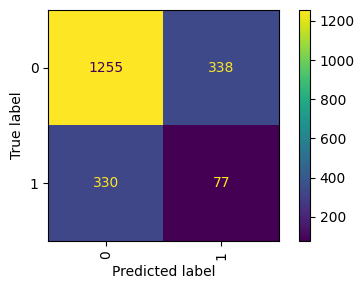


ROC AUC for test data :


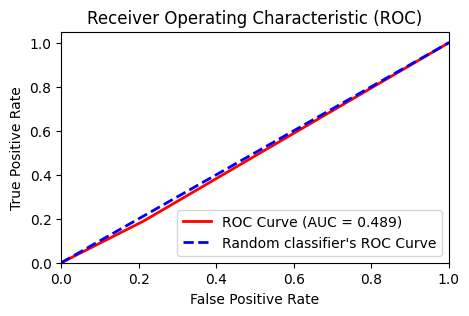

In [ ]:
dummy_clf.fit(X_test,y_test)
evaluate_metrics(dummy_clf)

### Logistic Regression

#### Hyperparameter Tuning

We are utilizing Grid Search cross-validation to fine-tune the hyperparameters of our machine learning models. Grid Search allows us to systematically explore various combinations of hyperparameters to optimize the model's performance.

In [ ]:
#Finding best hyper parameters using grid search cross-validation

hyp_params = [{"penalty":["elasticnet"],"C":[0.01,0.1,1.0],"solver":['saga'],"l1_ratio":[0.1,0.5,1.0]},
              {"penalty":["l2"],"C":[0.01,0.1,1.0],"solver":['lbfgs']},
              {"penalty":["l1","l2"],"C":[0.1,1.0],"solver":['liblinear']}
              ]

##following set of hyperparameter produces the best result
#hyp_params = {'C': [0.1], 'l1_ratio': [1.0], 'penalty': ['elasticnet'], 'solver': ['saga']}

stratified_cv = StratifiedKFold(n_splits=5)
log_reg = LogisticRegression(random_state=42,max_iter=10000,class_weight="balanced")
model = GridSearchCV(log_reg,param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="f1_macro")

In [ ]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=42),
             n_jobs=3,
             param_grid=[{'C': [0.01, 0.1, 1.0], 'l1_ratio': [0.1, 0.5, 1.0],
                          'penalty': ['elasticnet'], 'solver': ['saga']},
                         {'C': [0.01, 0.1, 1.0], 'penalty': ['l2'],
                          'solver': ['lbfgs']},
                         {'C': [0.1, 1.0], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']}],
             scoring='f1_macro', verbose=1)

In [ ]:
model.best_score_

0.6463234982204592

In [ ]:
model.best_params_

{'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}

- Cross Validation scores :

In [ ]:
best_model = LogisticRegression(C=0.01,penalty='elasticnet',solver='saga',
                                l1_ratio=0.5,random_state=42,max_iter=10000,
                                class_weight="balanced")
cv_scores(best_model)

Cross validation scores of the model with best hyperparameters:

macro f1 : mean = 0.646, std deviation = 0.006
roc_auc  : mean = 0.766, std deviation = 0.012
accuracy : mean = 0.712, std deviation = 0.004


#### Evaluation Metrics

In [ ]:
log_reg_final = best_model
log_reg_final.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight='balanced', l1_ratio=0.5,
                   max_iter=10000, penalty='elasticnet', random_state=42,
                   solver='saga')

Train accuracy : 0.71
Test accuracy : 0.72

Train macro f1 score : 0.65
Test macro f1 score : 0.65

Train ROC AUC score : 0.77
Test ROC AUC score : 0.78


Classification report for test data:

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1593
           1       0.39      0.71      0.51       407

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000


Confusion matrix for test data:


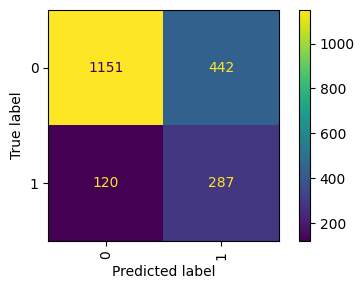


ROC AUC for test data :


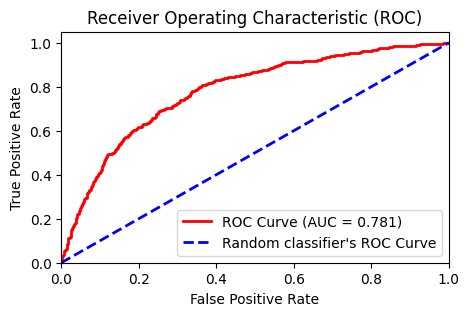

In [ ]:
evaluate_metrics(log_reg_final)

### Support Vector Machine

#### Hyperparameter Tuning

In [ ]:
#Finding best hyper parameters using grid search cross-validation

hyp_params = [{
    'C': [0.1, 1],           # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type (linear, radial basis function, etc.)
    'class_weight': ['balanced'],  # Class weight to balance imbalanced datasets
}
              ]

##following set of hyperparameter produces the best result
hyp_params = {'C': [1], 'class_weight': ['balanced'], 'kernel': ['rbf']}

stratified_cv = StratifiedKFold(n_splits=5)
svc = SVC(random_state=42,class_weight="balanced",probability=True)
model = GridSearchCV(svc,param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="f1_macro")

In [ ]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             n_jobs=3,
             param_grid={'C': [1], 'class_weight': ['balanced'],
                         'kernel': ['rbf']},
             scoring='f1_macro', verbose=1)

In [ ]:
model.best_score_

0.7320559821244641

In [ ]:
model.best_params_

{'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}

- Cross Validation scores :

In [ ]:
best_model = SVC(C= 1,class_weight="balanced",kernel='rbf',
                 random_state=42,probability=True)
cv_scores(best_model)

Cross validation scores of the model with best hyperparameters:

macro f1 : mean = 0.732, std deviation = 0.01
roc_auc  : mean = 0.852, std deviation = 0.009
accuracy : mean = 0.797, std deviation = 0.008


#### Evaluation Metrics

In [ ]:
svc_final = best_model
svc_final.fit(X_train,y_train)

SVC(C=1, class_weight='balanced', probability=True, random_state=42)

Train accuracy : 0.81
Test accuracy : 0.79

Train macro f1 score : 0.75
Test macro f1 score : 0.72

Train ROC AUC score : 0.89
Test ROC AUC score : 0.85


Classification report for test data:

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.49      0.74      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000


Confusion matrix for test data:


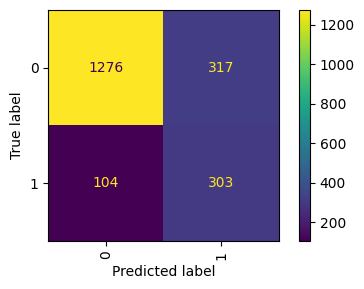


ROC AUC for test data :


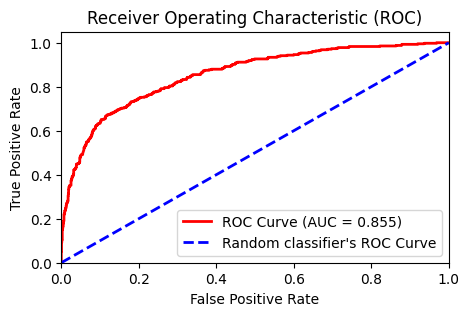

In [ ]:
evaluate_metrics(svc_final)

### Decision Tree Classifier

#### Hyperparameter Tuning

In [ ]:
hyp_params = {
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 10, 30, 50],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 50] }

##following set of hyperparameter produces the best result
hyp_params = {'max_depth': [10], 'max_features': ['sqrt'], 'max_leaf_nodes': [None],
              'min_samples_leaf':[1], 'min_samples_split': [30]}

stratified_cv = StratifiedKFold(n_splits=5)

model = GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight='balanced'),
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="f1_macro")


In [ ]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=3,
             param_grid={'max_depth': [10], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [30]},
             scoring='f1_macro', verbose=1)

In [ ]:
model.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 30}

In [ ]:
model.best_score_

0.6834129099088682

- Cross validation scores :

In [ ]:
best_model = DecisionTreeClassifier(max_depth=10,max_features='sqrt',max_leaf_nodes=None,
                                             min_samples_leaf=1,min_samples_split=30,random_state=42,
                                             class_weight='balanced')
cv_scores(best_model)

Cross validation scores of the model with best hyperparameters:

macro f1 : mean = 0.683, std deviation = 0.015
roc_auc  : mean = 0.784, std deviation = 0.018
accuracy : mean = 0.755, std deviation = 0.013


#### Evaluation Metrics

In [ ]:
decision_tree_final = best_model

decision_tree_final.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=30,
                       random_state=42)

Train accuracy : 0.79
Test accuracy : 0.72

Train macro f1 score : 0.74
Test macro f1 score : 0.66

Train ROC AUC score : 0.90
Test ROC AUC score : 0.78


Classification report for test data:

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1593
           1       0.40      0.73      0.52       407

    accuracy                           0.72      2000
   macro avg       0.66      0.73      0.66      2000
weighted avg       0.81      0.72      0.75      2000


Confusion matrix for test data:


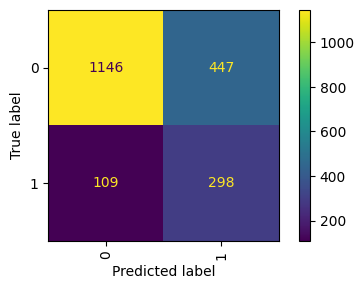


ROC AUC for test data :


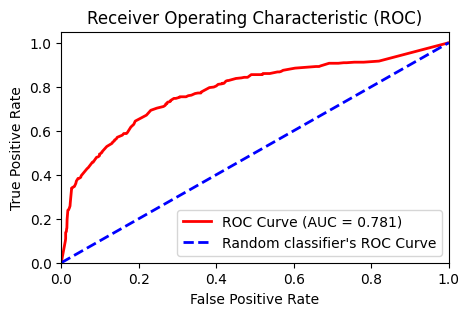

In [ ]:
evaluate_metrics(decision_tree_final)

### Random Forest Classifier

#### Hyperparameter Tuning

In [ ]:
hyp_params = {"n_estimators":[100,200],
                  "max_depth":[5,10,20,None],
                  "min_samples_split":[2,5,10],
                  'min_samples_leaf': [1, 2],
              }

##following set of hyperparameter produces the best result
hyp_params = {'max_depth':[10],'min_samples_leaf':[2],'min_samples_split':[5],'n_estimators':[100]}

stratified_cv = StratifiedKFold(n_splits=5)

model = GridSearchCV(RandomForestClassifier(random_state=42,class_weight='balanced'),
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="f1_macro")

In [ ]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=3,
             param_grid={'max_depth': [10], 'min_samples_leaf': [2],
                         'min_samples_split': [5], 'n_estimators': [100]},
             scoring='f1_macro', verbose=1)

In [ ]:
model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
model.best_score_

0.7627428270416121

- Cross validation scores :

In [ ]:
best_model = RandomForestClassifier(max_depth=10,min_samples_leaf=2,min_samples_split=5,
                                              n_estimators=100, random_state=42,class_weight='balanced')
cv_scores(best_model)

Cross validation scores of the model with best hyperparameters:

macro f1 : mean = 0.763, std deviation = 0.009
roc_auc  : mean = 0.863, std deviation = 0.009
accuracy : mean = 0.842, std deviation = 0.007


#### Evaluation Metrics

In [ ]:
random_forest_final = best_model
random_forest_final.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

Train accuracy : 0.90
Test accuracy : 0.84

Train macro f1 score : 0.85
Test macro f1 score : 0.76

Train ROC AUC score : 0.96
Test ROC AUC score : 0.86


Classification report for test data:

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1593
           1       0.59      0.67      0.63       407

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000


Confusion matrix for test data:


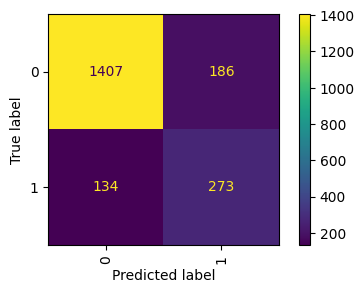


ROC AUC for test data :


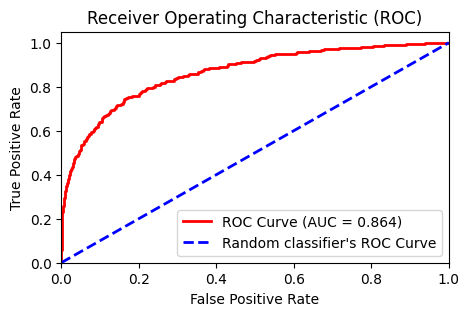

In [ ]:
evaluate_metrics(random_forest_final)

### XGBoost classifier

#### Hyperparameter Tuning

In [ ]:
#adjusting class weights for imbalanced labels
# Calculate the class weight ratio (negative class count / positive class count)
class_weight_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

hyp_params = {'learning_rate': [0.1,0.3],
    'max_depth': [3, 4],
    'n_estimators': [100, 200],
    'min_child_weight': [1,2,3,4],
    'subsample': [0.8,  1.0],
    'scale_pos_weight':[2,3,class_weight_ratio]
              }

##default
#hyp_params = {'learning_rate': [0.1], 'max_depth': [3], 'min_child_weight': [1], 'n_estimators': [100], 'subsample': [1]}
##following set of hyperparameter produces the best result
hyp_params = {'learning_rate': [0.1], 'max_depth': [3], 'min_child_weight': [2], 'n_estimators': [100],
              'subsample': [1],'scale_pos_weight': [2] }

stratified_cv = StratifiedKFold(n_splits=5)

model = GridSearchCV(XGBClassifier(random_state=42),
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=-1,verbose=1,scoring="f1_macro")

In [ ]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3],
                         'min_child_weight': [2], 'n_estimators': [100],
                         'scale_pos_weight': [2], 'subsample': [1]},
             scoring='f1_macro', verbose=1)

In [ ]:
model.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 100,
 'scale_pos_weight': 2,
 'subsample': 1}

In [ ]:
model.best_score_

0.7700247676329111

- Cross validation scores :

In [ ]:
best_model = XGBClassifier(learning_rate=0.1,max_depth= 3,min_child_weight= 2,
                           n_estimators= 100,subsample=1.0,random_state=42,
                           scale_pos_weight= 2)
cv_scores(best_model)

Cross validation scores of the model with best hyperparameters:

macro f1 : mean = 0.77, std deviation = 0.012
roc_auc  : mean = 0.865, std deviation = 0.012
accuracy : mean = 0.855, std deviation = 0.008


#### Evaluation Metrics

In [ ]:
xgb_final = best_model
xgb_final.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Train accuracy : 0.86
Test accuracy : 0.86

Train macro f1 score : 0.78
Test macro f1 score : 0.77

Train ROC AUC score : 0.89
Test ROC AUC score : 0.87


Classification report for test data:

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1593
           1       0.65      0.62      0.63       407

    accuracy                           0.86      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.85      0.86      0.85      2000


Confusion matrix for test data:


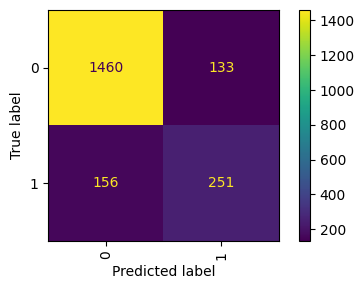


ROC AUC for test data :


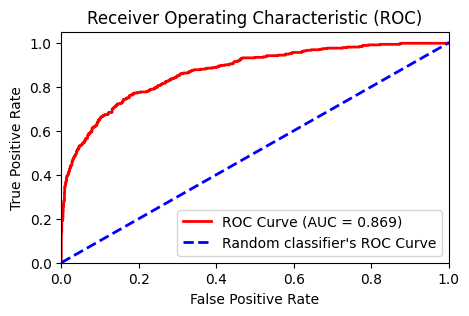

In [ ]:
evaluate_metrics(xgb_final)

#### Feature importance

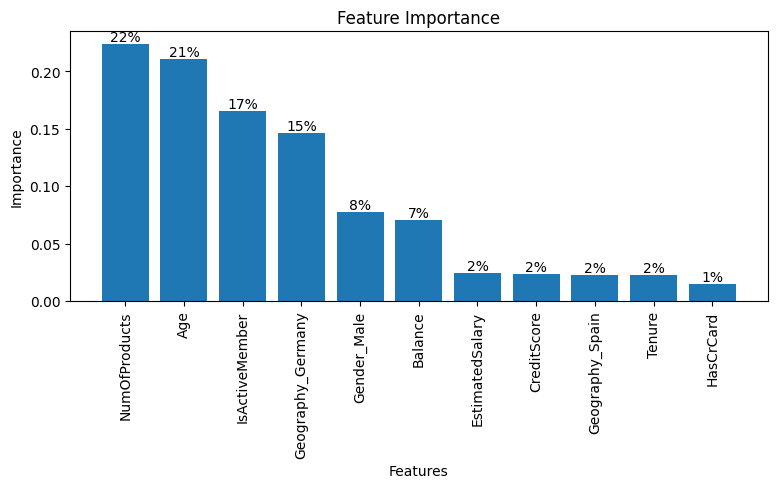

In [ ]:
feat_imp = pd.DataFrame(xgb_final.feature_importances_,index = X_train.columns.tolist())
feat_imp = feat_imp.sort_values(by=0,ascending=False)

plt.figure(figsize=(9, 3.5))
plt.bar(feat_imp.index, feat_imp[0])
for i, count in enumerate(feat_imp[0]):
    plt.text(i, count, f"{round(count*100)}%", ha='center', va='bottom')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### Comparing Performance of Different Models

In [ ]:
train_acc = []
test_acc = []
train_f1 = []
test_f1 = []
train_auc = []
test_auc = []
classifiers = [log_reg_final,svc_final,decision_tree_final,random_forest_final,xgb_final]
for  model in classifiers:
    y_train_pred = model.predict(X_train)
    y_train_scores = model.predict_proba(X_train)[:, 1]

    y_test_pred = model.predict(X_test)
    y_test_scores = model.predict_proba(X_test)[:, 1]

    train_acc.append(round(accuracy_score(y_train,y_train_pred),2))
    test_acc.append(round(accuracy_score(y_test,y_test_pred),2))

    train_f1.append(round(f1_score(y_train,y_train_pred,average='macro'),2))
    test_f1.append(round(f1_score(y_test,y_test_pred,average='macro'),2))

    train_auc.append(round(roc_auc_score(y_train, y_train_scores),3))
    test_auc.append(round(roc_auc_score(y_test, y_test_scores),3))

metrics = {"classifier":["Logistic regression","Support Vector Machine","Decision tree","Random Forest","XGBoost"],
 "Train_accuracy":train_acc, "Test_accuracy":test_acc, "Train_f1_macro":train_f1, "Test_f1_macro":test_f1,
 "Train_ROC_AUC":train_auc,"Test_ROC_AUC":test_auc}


In [ ]:

multi_columns = [("Classifier model",""),("Accuracy","Train"),("Accuracy","Test"),
                 ("f1_macro","Train"),("f1_macro","Test"),("ROC_AUC","Train"),("ROC_AUC","Test")
]

metrics_df = pd.DataFrame(metrics)
metrics_df.columns = pd.MultiIndex.from_tuples(multi_columns)
#metrics_df = metrics_df.style.set_properties(**{'text-align': 'left'}, subset=pd.IndexSlice[:, :])
metrics_df

Classifier model Accuracy       f1_macro       ROC_AUC       
                             Train  Test    Train  Test   Train   Test
0     Logistic regression     0.71  0.72     0.65  0.65   0.768  0.781
1  Support Vector Machine     0.81  0.79     0.75  0.72   0.891  0.855
2           Decision tree     0.79  0.72     0.74  0.66   0.900  0.781
3           Random Forest     0.90  0.84     0.85  0.76   0.956  0.864
4                 XGBoost     0.86  0.86     0.78  0.77   0.886  0.869

The XGBoost and Random Forest models outperformed the other models in terms of accuracy, f1 score, and ROC AUC score. The significant values of all these metrics on the test data indicate that these two models are very good at discriminating between positive and negative classes in unseen data. Some overfitting is observed in the Random Forest model, while XGBoost showed a better balance in the bias-variance trade-off.

A more rigorous hyperparameter tuning and exploration of additional algorithms may provide us with a further improved model.

## Conclusions <a id="conclusions"></a>

- In this customer churn prediction project, we evaluated the performance of five distinct machine learning classifier models: Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, and XGBoost. All of these machine learning models performed significantly better than the baseline model, which was a dummy classifier. This  demonstrates the valuable role that machine learning can play in predicting customer churn based on the provided information.

- The XGBoost and Random Forest models emerged as the top-performing models, exhibiting the highest accuracy, f1 score, and ROC AUC score. They generalize well to unseen data. These models displayed a good balance between precision and recall, complemented by a well-shaped ROC curve, indicating their effectiveness in discriminating between target classes.

- This project also demonstrates the importance of choosing appropriate evaluation metrics for classification tasks. When working with an imbalanced dataset, accuracy alone is not a reliable indicator of performance. Instead, various metrics like F1-score, precision, recall, and ROC AUC score should be considered. The choice of metrics should depend on the cost associated with false positives and false negatives. Precision is essential when the cost of false positives is high, and recall is crucial when false negatives are expensive. In the absence of cost information, optimizing for the f1-score or ROC AUC score can help balance precision and recall.

- As a potential future extension, the implementation of deep learning algorithms may result in an improved model for this project.